In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score, roc_auc_score
import joblib
import streamlit as st
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [26]:
#Dataset link:
#https://www.kaggle.com/datasets/abdo977/used-car-price-in-egypt


# Read the file
df = pd.read_csv(r"C:\Users\RTX\OneDrive\Desktop\Final project\Cars.csv")

df.head()


,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14741 non-null  int64  
 1   Brand         14741 non-null  object 
 2   Model         14741 non-null  object 
 3   Body          14741 non-null  object 
 4   Color         14741 non-null  object 
 5   Year          14741 non-null  int64  
 6   Fuel          14741 non-null  object 
 7   Kilometers    14741 non-null  object 
 8   Engine        14741 non-null  object 
 9   Transmission  14741 non-null  object 
 10  Price         14741 non-null  float64
 11  Gov           14741 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


In [4]:
#unique_brands = df["Brand"].unique()
#print(unique_brands)


In [5]:
# Check for duplicate rows
duplicated_rows = df.duplicated()
print('Number of duplicate rows = ', duplicated_rows.sum())

# Check for missing values
missing_values = df.isnull().sum()
print('Number of missing values in each column = ', missing_values)

Number of duplicate rows =  0
Number of missing values in each column =  Unnamed: 0      0
Brand           0
Model           0
Body            0
Color           0
Year            0
Fuel            0
Kilometers      0
Engine          0
Transmission    0
Price           0
Gov             0
dtype: int64


In [6]:
# Drop the unnamed column and duplicates
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza


In [7]:
# Display statistical analysis for numerical data
df.describe()

,Year,Price
count,14741.000000,14741.000000
mean,2005.456821,116.584987
std,12.655566,82.192718
min,1970.000000,3.000000
25%,1998.000000,43.700000
50%,2010.000000,110.000000
75%,2015.000000,161.000000
max,2022.000000,471.500000


In [8]:
# Perform univariate and bivariate analysis on numeric columns only
df.select_dtypes(include=[np.number]).describe()
df.select_dtypes(include=[np.number]).corr()

,Year,Price
Year,1.000000,0.774288
Price,0.774288,1.000000


In [9]:
# Display statistical analysis for non-numerical data
df.describe(include=['O'])

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Gov
count,14741,14741,14741,14741,14741,14741,14741,14741,14741
unique,3,18,3,14,2,16,3,2,26
top,Hyundai,128,Sedan,White,Benzine,More than 200000,1600 CC,Manual,Cairo
freq,5692,2425,13453,2614,14200,2505,6762,9862,4458


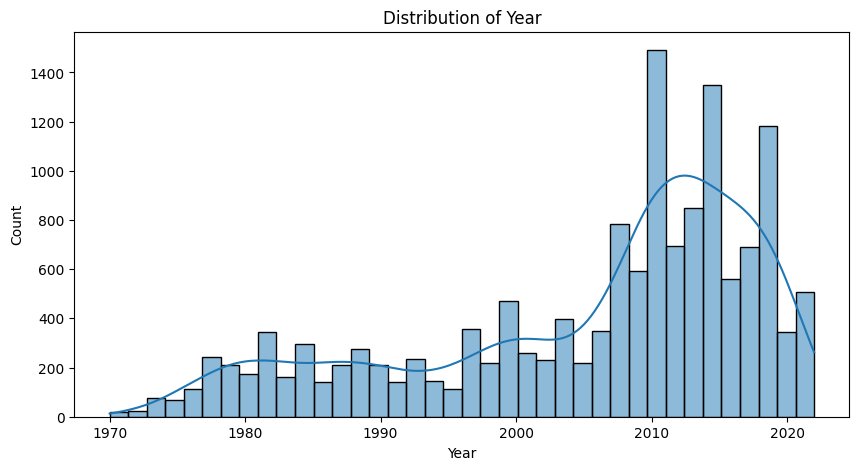

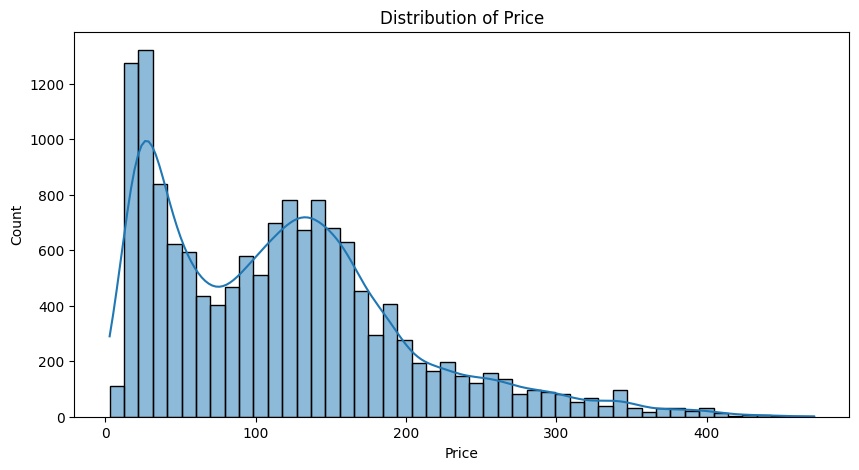

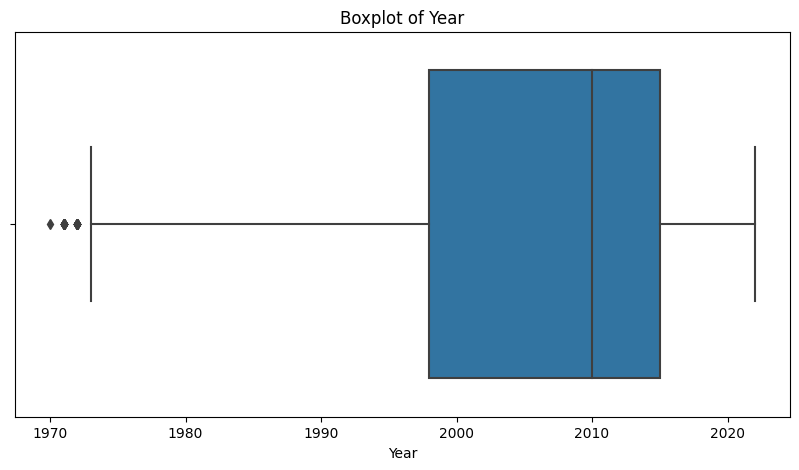

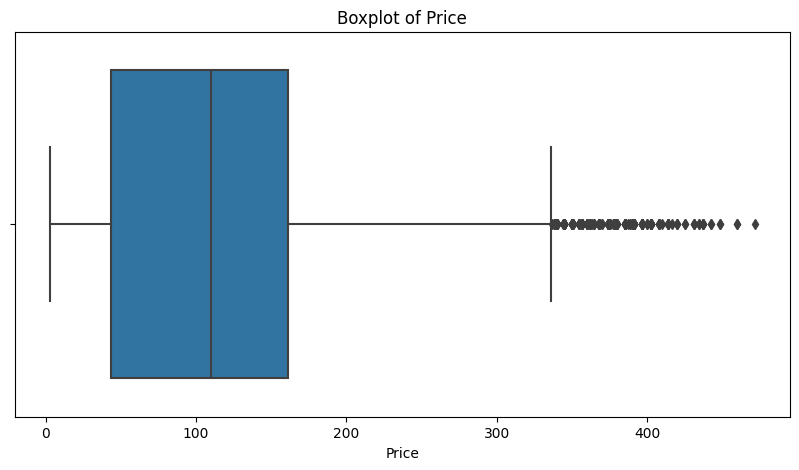

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of numerical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plotting boxplots for numerical columns to detect outliers
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [11]:
from scipy.stats import zscore

# Calculate z-scores of `df`
z_scores = zscore(df.select_dtypes(include=['int64', 'float64']))

# Define a threshold to identify an outlier
threshold = 3

# Get boolean mask where z-score greater than the threshold
mask = (np.abs(z_scores) < threshold).all(axis=1)

# Remove outliers
df = df[mask]

# Normalize the numerical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

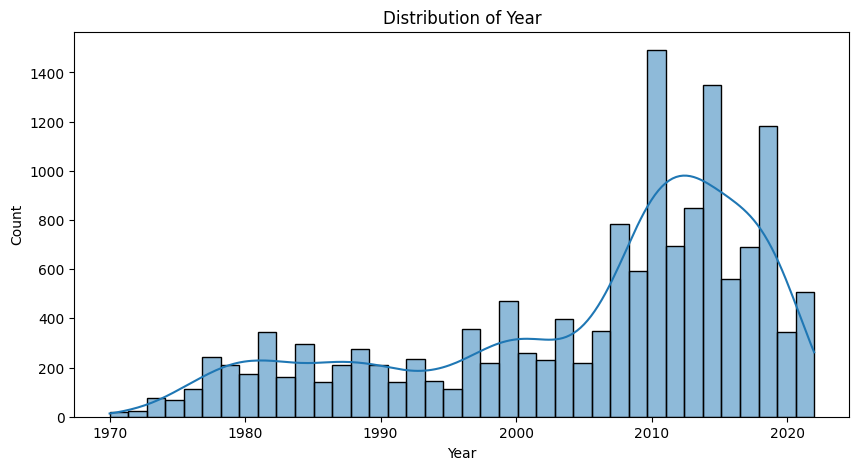

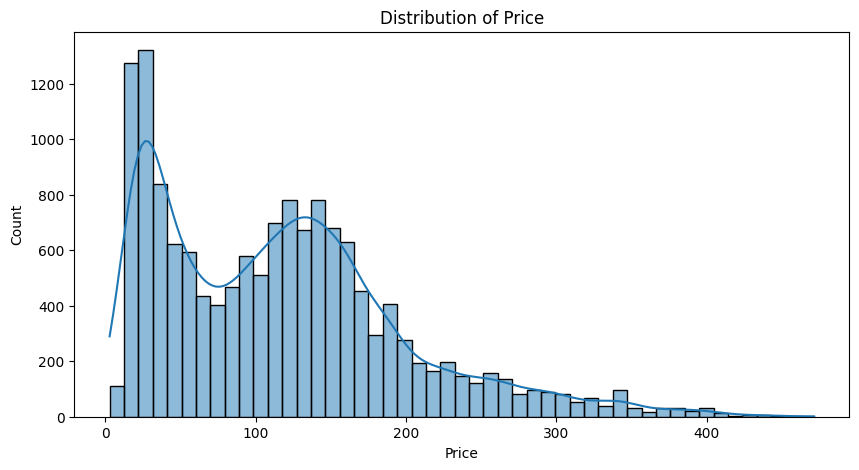

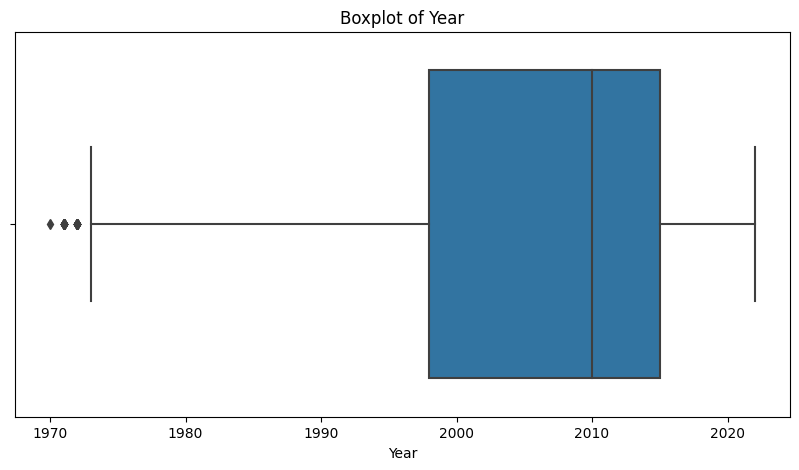

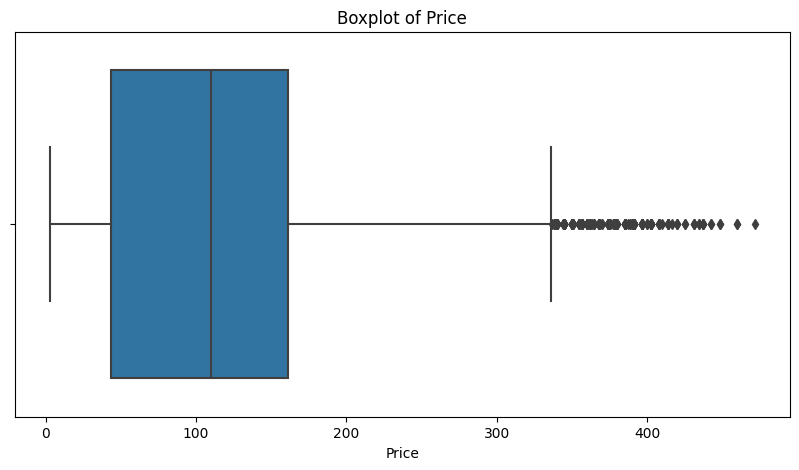

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Read the file
df = pd.read_csv(r"C:\Users\RTX\OneDrive\Desktop\Final project\Cars.csv")

# Drop the unnamed column and duplicates
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop_duplicates(inplace=True)

# Display statistical analysis for numerical data
numerical_stats = df.describe()

# Display statistical analysis for non-numerical data
categorical_stats = df.describe(include=['O'])

# Plotting the distribution of numerical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plotting boxplots for numerical columns to detect outliers
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Calculate z-scores of numerical columns
z_scores = zscore(df.select_dtypes(include=['int64', 'float64']))

# Define a threshold to identify an outlier
threshold = 3

# Get boolean mask where z-score greater than the threshold
mask = (np.abs(z_scores) < threshold).all(axis=1)

# Remove outliers
df = df[mask]

# Normalize the numerical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()


D:\Epsilon_Karam\envs\karam\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


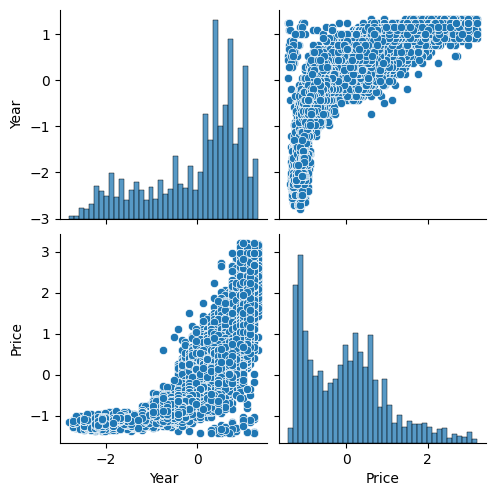

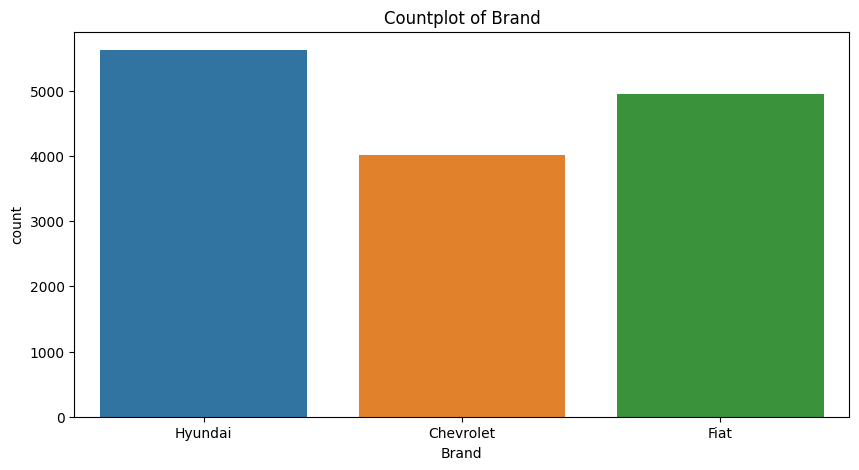

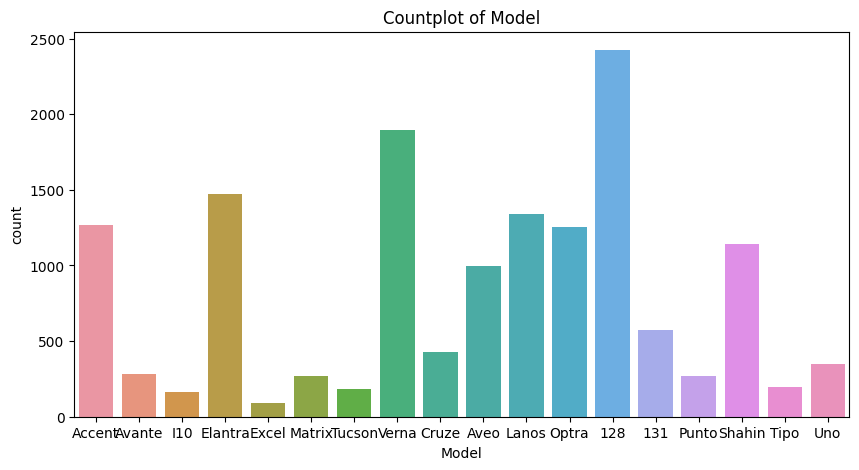

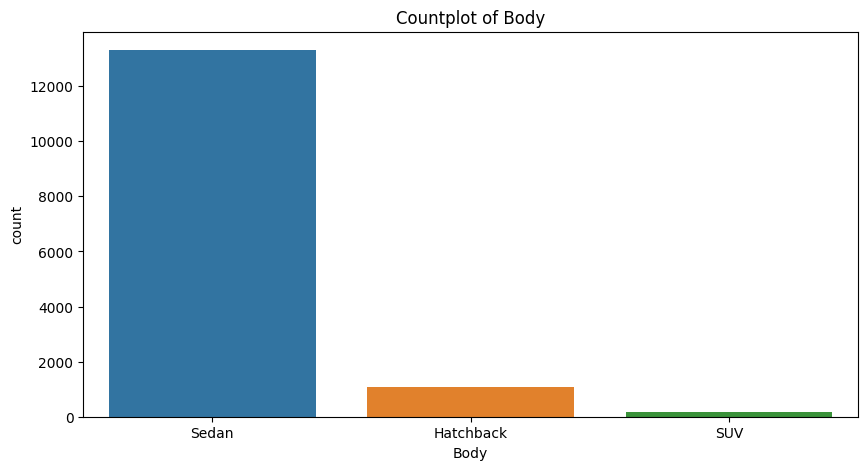

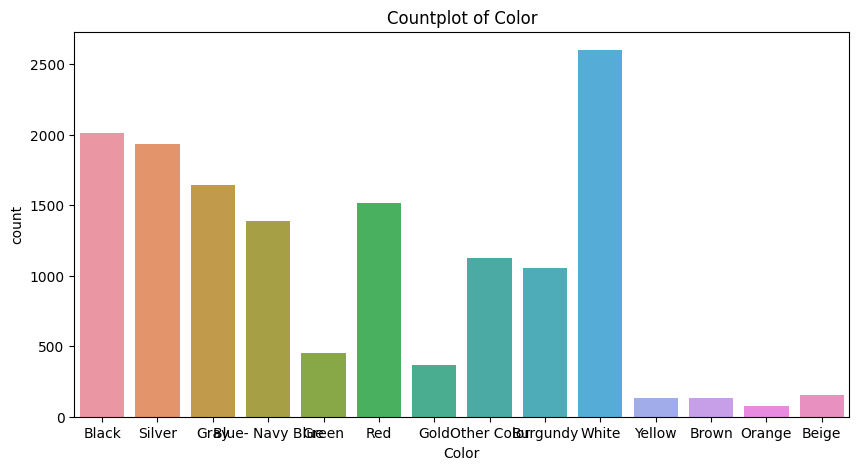

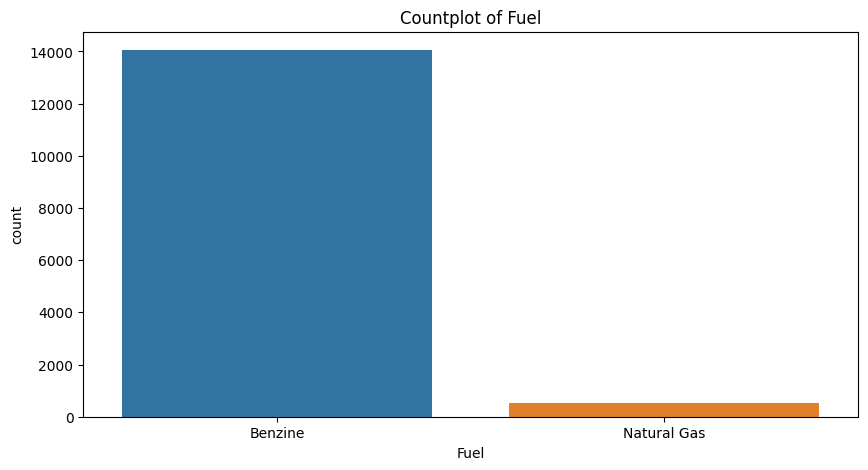

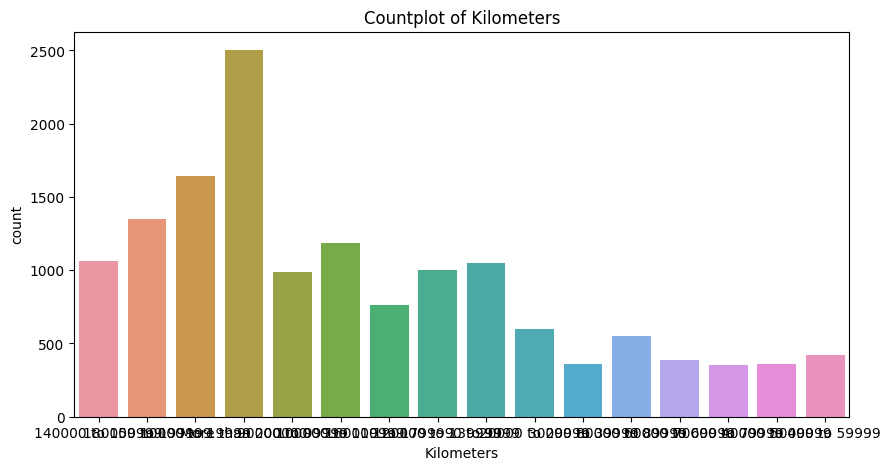

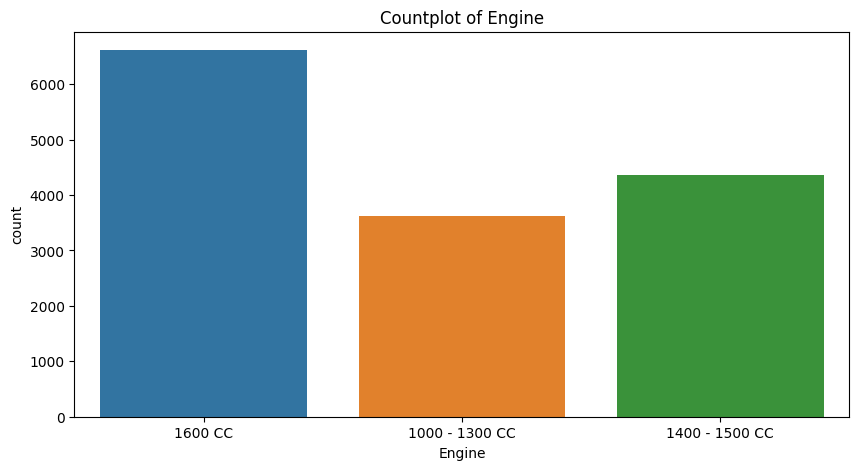

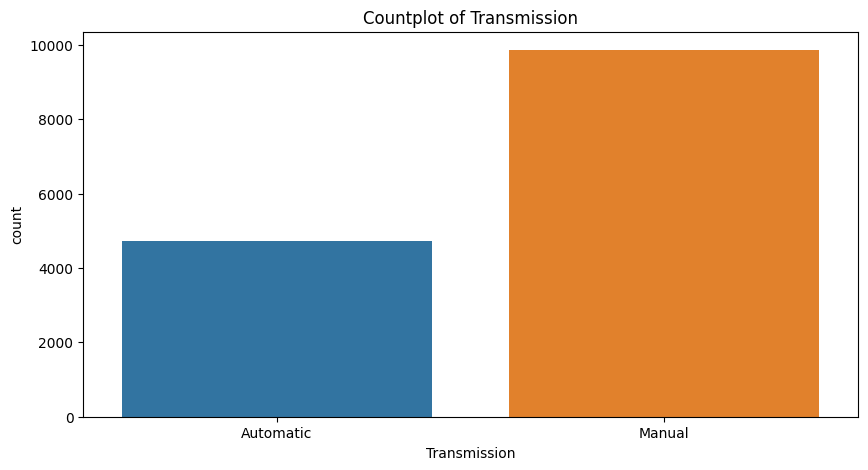

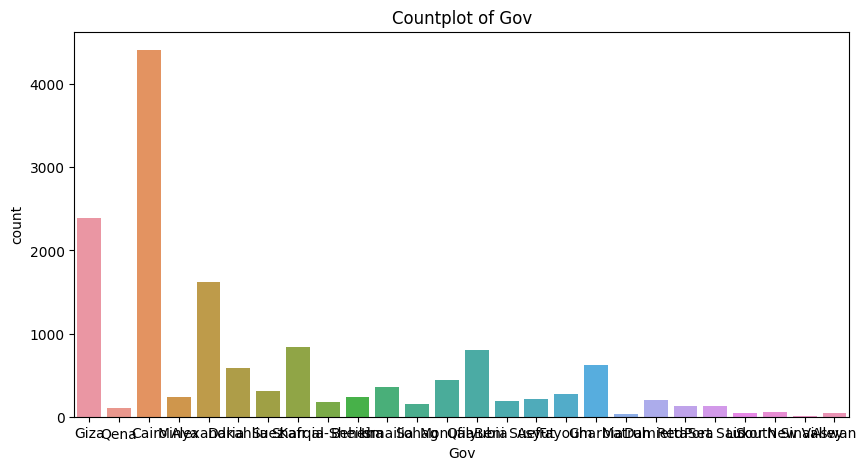

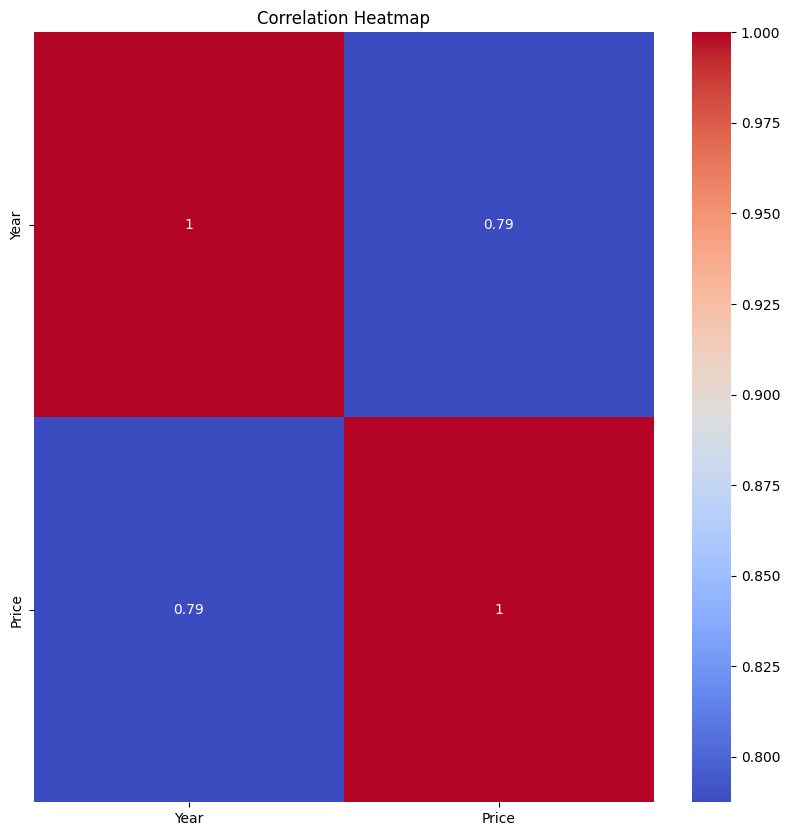

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for numerical columns
df_numerical = df.select_dtypes(include=['int64', 'float64'])
sns.pairplot(df_numerical)
plt.show()

# Countplot for categorical columns
df_categorical = df.select_dtypes(include=['object'])
for col in df_categorical.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df_categorical)
    plt.title(f'Countplot of {col}')
    plt.show()

# Correlation heatmap for numerical columns
corr = df_numerical.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## The question is "What is the predicted price of a car given its features?"

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Define categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Define numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# Define models
models = {
    'lr': LinearRegression(),
    'dt': DecisionTreeRegressor(random_state=0),
    'svr': SVR(),
    'xgb': XGBRegressor(random_state=0),
    'cat': CatBoostRegressor(verbose=0, random_state=0)
}

In [15]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# Print the column names in categorical_cols and numerical_cols
#print("Categorical columns:", categorical_cols)
#print("Numerical columns:", numerical_cols)

# Print the column names in X_train
#print("Columns in X_train:", X_train.columns)

In [17]:
# Remove outliers
df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]


In [18]:
# Feature Engineering
X = df.drop(columns=['Price'])
y = df['Price']

In [19]:
# Preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Define preprocessor
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(['Price'], axis=1).columns
categorical_features = df.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Define the pipelines
pipelines = [
    ('Linear Regression', Pipeline([('preprocessor', preprocessor), ('model', LinearRegression())])),
    ('Decision Tree', Pipeline([('preprocessor', preprocessor), ('model', DecisionTreeRegressor())])),
    ('SVR', Pipeline([('preprocessor', preprocessor), ('model', SVR())])),
    ('Gradient Boosting', Pipeline([('preprocessor', preprocessor), ('model', GradientBoostingRegressor())])),
    ('XGBoost', Pipeline([('preprocessor', preprocessor), ('model', XGBRegressor())])),
    ('CatBoost', Pipeline([('preprocessor', preprocessor), ('model', CatBoostRegressor(silent=True))]))
]



In [22]:
# Split your data into training and testing data
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the models and print the results
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_score = cross_val_score(pipeline, X, y, cv=kfold).mean()
    print(f'Model: {name}')
    print(f'Training Score: {train_score}')
    print(f'Testing Score: {test_score}')
    print(f'Cross-Validation Score: {cv_score}\n')

Model: Linear Regression
Training Score: 0.8563185578576622
Testing Score: 0.8530579513768644
Cross-Validation Score: 0.8539602097907197

Model: Decision Tree
Training Score: 0.9913150923775423
Testing Score: 0.872153870725149
Cross-Validation Score: 0.8768258906673976

Model: SVR
Training Score: 0.9301403209223968
Testing Score: 0.9141519749589402
Cross-Validation Score: 0.912884095080722

Model: Gradient Boosting
Training Score: 0.9118990134336952
Testing Score: 0.9072297128674103
Cross-Validation Score: 0.9077831662296978

Model: XGBoost
Training Score: 0.9664796955418605
Testing Score: 0.9234193260670347
Cross-Validation Score: 0.9273785446034972

Model: CatBoost
Training Score: 0.9544497097579073
Testing Score: 0.9241609891334658
Cross-Validation Score: 0.9273175297489313



In [24]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Select the best model
best_model = max(pipelines, key=lambda item:item[1].score(X_test, y_test))
print(f'Best model: {best_model[0]}')



Best model: CatBoost


In [25]:
%%writefile Car_Price.py

import streamlit as st
import joblib
import pandas as pd

# Load the model and the inputs
model = joblib.load('best_model.pkl')
df1 = pd.read_csv(r"C:\Users\RTX\OneDrive\Desktop\Final project\Cars.csv")

def user_input_features(df):
    """Collect user inputs for car features"""
    # Define the features
    Brand = st.selectbox('Brand', options=df['Brand'].unique())
    Model = st.selectbox('Model', options=df['Model'].unique())
    Body = st.selectbox('Body', options=df['Body'].unique())
    Color = st.selectbox('Color', options=df['Color'].unique())
    Year = st.slider('Year', min_value=int(df['Year'].min()), max_value=int(df['Year'].max()), value=int(df['Year'].mean()))
    Fuel = st.selectbox('Fuel', options=df['Fuel'].unique())
    Kilometers = st.selectbox('Kilometers', options=df['Kilometers'].unique())
    Engine = st.selectbox('Engine', options=df['Engine'].unique())
    Transmission = st.selectbox('Transmission', options=df['Transmission'].unique())
    Gov = st.selectbox('Gov', options=df['Gov'].unique())

    # Create a data frame from the inputs
    data = {
        'Brand': [Brand],
        'Model': [Model],
        'Body': [Body],
        'Color': [Color],
        'Year': [Year],
        'Fuel': [Fuel],
        'Kilometers': [Kilometers],
        'Engine': [Engine],
        'Transmission': [Transmission],
        'Gov': [Gov]
    }
    features = pd.DataFrame(data)
    return features

def predict(model, input_df):
    """Make predictions and display them"""
    prediction = model.predict(input_df)
    st.write(f'The predicted price for this {input_df["Brand"][0]} {input_df["Model"][0]} car is ', prediction[0])

def main():
    """Main function to run the app"""
    st.title('Car Price Prediction App')
    st.write('Enter the details of the car and get the predicted price!')
    input_df = user_input_features(df1)
    predict(model, input_df)

if __name__ == '__main__':
    main()


Overwriting Car_Price.py


In [ ]:
#streamlit run Car_Price.py
